In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
!pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.1 MB 8.2 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.1 MB 6.0 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.1 MB 6.8 MB/s eta 0:00:02
   ------------------- -------------------- 5.5/11.1 MB 6.8 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.1 MB 6.8 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.1 MB 6.2 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 6.0 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.1 MB 5.6 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.1 MB 5.2 MB/s eta 0:00:01
   -------------------------------------- - 10.7/11.1 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 5.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
data = pd.read_csv("C:\\Users\\athiv\\Downloads\\colorado_motor_vehicle_sales.csv")

In [3]:
pd.isnull(data)
#to check for null values

,year,quarter,county,sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
496,False,False,False,False
497,False,False,False,False
498,False,False,False,False
499,False,False,False,False


In [4]:
pd.isnull(data).sum()
#to check for null values

year       0
quarter    0
county     0
sales      0
dtype: int64

In [5]:
print(data.head())

   year  quarter              county      sales
0  2008        1               Adams  231609000
1  2008        1            Arapahoe  550378000
2  2008        1  Boulder/Broomfield  176771000
3  2008        1              Denver  200103000
4  2008        1             Douglas   93259000


In [7]:


data['year'] = pd.to_datetime(data['year'], format='%Y')  # Convert year column to datetime


In [9]:
data['year'].dtypes #to know the data types

dtype('<M8[ns]')

In [10]:
print(data.dtypes) #to know the data types

year       datetime64[ns]
quarter             int64
county             object
sales               int64
dtype: object


In [11]:
data.describe() #to return the description of the data in the Dataframe(count,mean.std...)

,year,quarter,sales
count,501,501.000000,5.010000e+02
mean,2011-07-28 15:14:00.718563072,2.502994,1.760585e+08
min,2008-01-01 00:00:00,1.000000,6.274000e+06
25%,2010-01-01 00:00:00,2.000000,6.148200e+07
50%,2012-01-01 00:00:00,3.000000,1.385820e+08
75%,2014-01-01 00:00:00,4.000000,2.241580e+08
max,2015-01-01 00:00:00,4.000000,9.169100e+08
std,NaN,1.120041,1.642055e+08


In [12]:
data.columns

Index(['year', 'quarter', 'county', 'sales'], dtype='object')

<Axes: xlabel='year', ylabel='sales'>

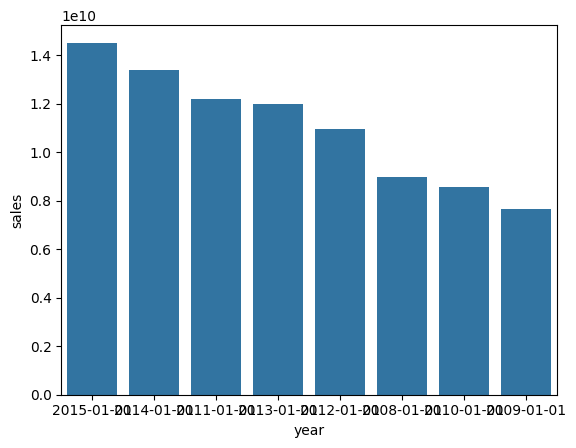

In [15]:
sales_year = data.groupby(['year'], as_index=False)['sales'].sum().sort_values(by='sales', ascending=False)

sns.barplot(x = 'year',y= 'sales' ,data = sales_year)

<Axes: xlabel='quarter', ylabel='sales'>

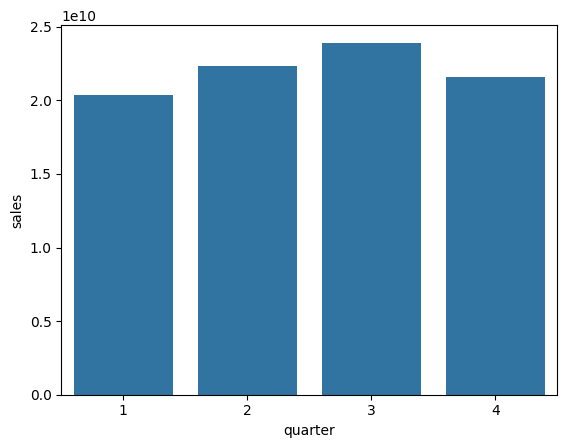

In [16]:
sales_quarter = data.groupby(['quarter'], as_index=False)['sales'].sum().sort_values(by='sales', ascending=False)

sns.barplot(x = 'quarter',y= 'sales' ,data = sales_quarter)

<Axes: xlabel='county', ylabel='sales'>

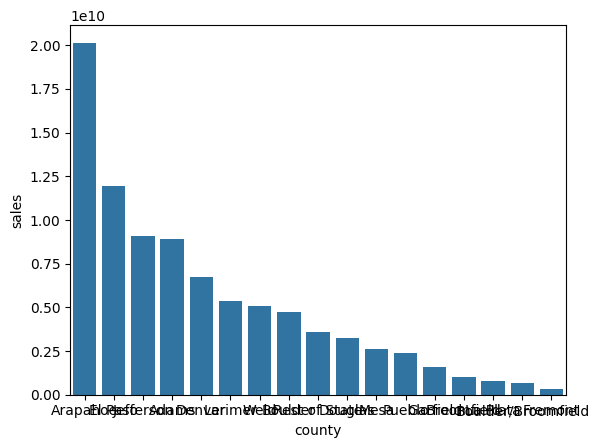

In [17]:
sales_county = data.groupby(['county'], as_index=False)['sales'].sum().sort_values(by='sales', ascending=False)

sns.barplot(x = 'county',y= 'sales' ,data = sales_county)

<Axes: xlabel='county', ylabel='sales'>

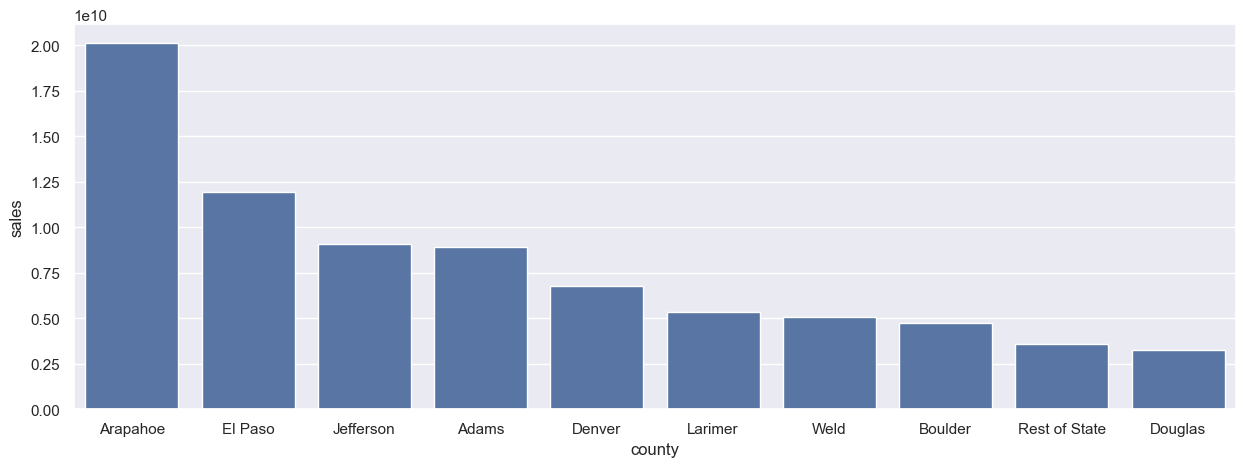

In [19]:
# total number of sales from top 10 county

sales_county = data.groupby(['county'], as_index=False)['sales'].sum().sort_values(by='sales', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_county, x = 'county',y= 'sales')

<Axes: xlabel='year', ylabel='sales'>

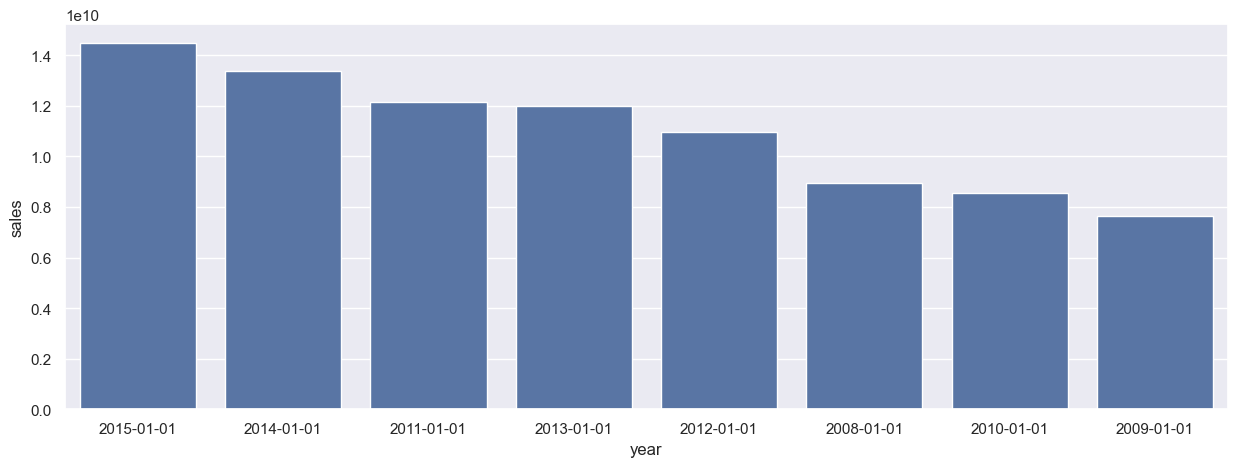

In [20]:
# total number of sales in top 10 years
sales_year = data.groupby(['year'], as_index=False)['sales'].sum().sort_values(by='sales', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_year, x = 'year',y= 'sales')

CONCLUSION:

Sales figures vary significantly across counties, with high sales in populous areas like Arapahoe and El Paso.Q3 (July-Sept) is the Best Performing Quarter: With $23.91B in sales, this suggests peak vehicle purchases occur in summer.2013-2015 Strong Growth: From 2013 to 2015, sales grew consistently and 2008-2009 Decline in sales.Sales Declined in 2009 but Recovered Strongly After 2010.
Peak Sales Occur in Q3 (Summer), While Q1 Sees the Lowest Sales.
Arapahoe County is the Market Leader in Vehicle Sales, Followed by El Paso & Jefferson.
Denver, Despite Being the Capital, Ranks Lower 

